<a href="https://colab.research.google.com/github/drjhero/data294/blob/main/longneckerChapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.14 Evaluating whether or not a population distribution is normal

We will create a normal probability plot. This plots the values of the quantiles of the data we are inspecting. It compares this to the quantiles expected from a normal distribution.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas  as pd
cholesterolData = pd.read_csv('/content/drive/MyDrive/Teaching/DATA 294/data/cholesterolReadings.csv')
cholesterolData

Mounted at /content/drive


,cholesterol
0,133
1,137
2,148
3,149
4,152
5,167
6,174
7,179
8,189
9,192


In [24]:
rankedDataFrame = cholesterolData.cholesterol.transform(func = [lambda x: x, 'rank'])
rankedDataFrame.rename(columns={'<lambda>': 'cholesterol'}, inplace=True)
rankedDataFrame

,cholesterol,rank
0,133,1.0
1,137,2.0
2,148,3.0
3,149,4.0
4,152,5.0
5,167,6.0
6,174,7.0
7,179,8.0
8,189,9.0
9,192,10.0


In [25]:
# Longnecker appendix 1. Shows the area under the normal curve for a given quantile.
import scipy.stats as st
st.norm.ppf(0.025)
# st.norm.cdf(0.025)

-1.9599639845400545

In [36]:
quantileSeries = rankedDataFrame['rank'].map(lambda x: (x - 0.5)/20)
quantileSeries.name = "quantile"
quantileSeries

0     0.025
1     0.075
2     0.125
3     0.175
4     0.225
5     0.275
6     0.325
7     0.375
8     0.425
9     0.475
10    0.525
11    0.575
12    0.625
13    0.675
14    0.725
15    0.775
16    0.825
17    0.875
18    0.925
19    0.975
Name: quantile, dtype: float64

In [37]:
normalQuantileSeries = quantileSeries.map(lambda x: st.norm.ppf(x))
normalQuantileSeries.name = "normalQuantile"
normalQuantileSeries

0    -1.959964
1    -1.439531
2    -1.150349
3    -0.934589
4    -0.755415
5    -0.597760
6    -0.453762
7    -0.318639
8    -0.189118
9    -0.062707
10    0.062707
11    0.189118
12    0.318639
13    0.453762
14    0.597760
15    0.755415
16    0.934589
17    1.150349
18    1.439531
19    1.959964
Name: normalQuantile, dtype: float64

In [38]:
plotDataFrame = pd.concat([rankedDataFrame['cholesterol'], normalQuantileSeries], axis=1, join="inner")
plotDataFrame

,cholesterol,normalQuantile
0,133,-1.959964
1,137,-1.439531
2,148,-1.150349
3,149,-0.934589
4,152,-0.755415
5,167,-0.597760
6,174,-0.453762
7,179,-0.318639
8,189,-0.189118
9,192,-0.062707


We expect this plot [to follow a straight line.](https://stats.stackexchange.com/questions/208511/why-is-the-qq-plot-for-normal-distribution-a-straight-line#:~:text=is%20not%20useful-,Why%20is%20the%20QQ%20Plot%20for%20Normal%20Distribution%20a%20Straight,standard%20normal%20distribution%20to%20give.)

<Axes: xlabel='normalQuantile', ylabel='cholesterol'>

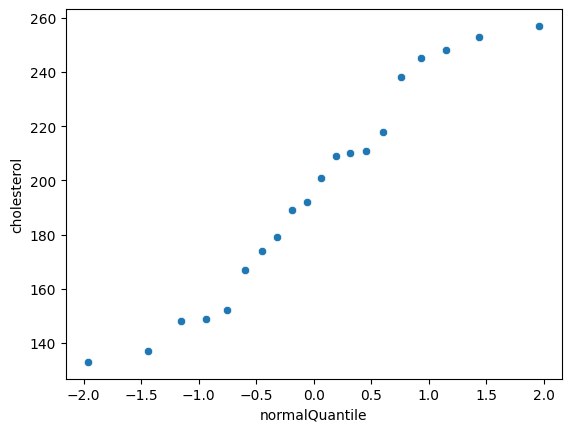

In [42]:
import seaborn as sns

sns.scatterplot(data=plotDataFrame, x="normalQuantile", y="cholesterol")

<Axes: xlabel='normalQuantile', ylabel='cholesterol'>

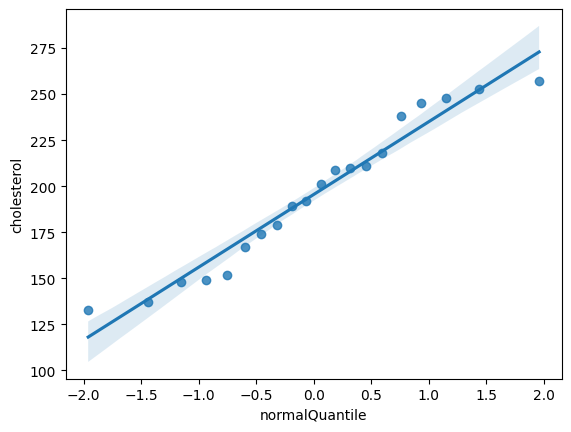

In [41]:
sns.regplot(data=plotDataFrame, x="normalQuantile", y="cholesterol")

We have rough guidance on how good of a correlation we can expect to claim its normally distributed.
  * p < 0.1 then *very poor fit*
  * 0.01 <= p < .05 then *poor fit*
  * 0.05 <= p < 0.1 then *acceptable fit*
  * 0.10 <= p < 0.5 then *good fit*
  * p >= 0.5 then *excellent fit*

In [46]:
# In this case we have an excellent fit and it is likely that this
# is normally distributed.
plotDataFrame.corr()

,cholesterol,normalQuantile
cholesterol,1.000000,0.979459
normalQuantile,0.979459,1.000000
